In [28]:
!jupyter nbconvert approach.ipynb --to slides --post serve 

[NbConvertApp] Converting notebook approach.ipynb to slides
[NbConvertApp] Writing 370743 bytes to approach.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0


# Data-driven system indentification of COVID-19 cases in several countries

Goals:

- Find a global model for the evolution of the cases in several countries
- Based on country indicators

The approach consists in finding a function $f$ such that for any country $c$ and at any day $t$:

$$y_{c, t+1} = f(y_{c, t}, i_{c, t})$$ 

Where $y_{c, t}$ is the number of cases in country $c$ at day $t$ and $i_{c, t}$ is the information about the country at day $t$.


-----
<small>Author: Cyprien Neverov, email: cyprien.neverov@mines-ales.org</small>

## Data

| Variable  | Explanation  | Nature  |
|---|---|---|
| $y_t$  | The state of the system: the number of cases in the country  | The state, time-dependent  |
| $i_{1, t}$  |  Stringency index: how severe are the containment measures. (the control) | Time-dependent  |
| $i_{2}$ | Human developpement index  | Constant  |
| $i_{3}$ | Total population  | Constant  |
| $i_{4}$ | Population ages 65 and above (% of total)  | Constant  |
| $i_{5}$ | Hospital beds (per 1,000 people)  |  Constant |
| $i_{6}$ | People using at least basic sanitation services (% of population)  | Constant  |
| $i_{7}$ | Life expectancy at birth, total (years)  |  Constant |
| ... | ...  |   |
| $i_{40}$ | Cause of death, by injury (% of total)  | Constant  |




We want to find a general formula of the following form<sup>1</sup>:

$$y_{t+1} = f(y_t, i_{1, t}, i_2, i_3, i_4, ... , i_{40})$$ 

-----
<small>Data retrieved from [2] and [3]. There are examples of plots showing the evolution of cases and stringency in the appendix.</small>

<sup>1</sup><small>The country indexes were omitted for better readability.</small>

## Model

Using sparse system identification proposed by S. Brunton in [1].

If we call $V = \{y_t, i_{1, t}, i_2, i_3, i_4, ... , i_{40}\}$ the set of all the variables and $\theta_j$ the coefficients.

$$y_{t+1} = f(y_t, i_{1, t}, i_2, i_3, i_4, ... , i_{40}) = \sum_{v_1, v_2, v_3 \in V^3, y \in \{v_1, v_2, v_3\}} \theta_{v_1, v_2, v_3} \times v_1 v_2 v_3$$

Humanly speaking if we had only 3 variables $y, i_1$ and $i_2$ this would be:


\begin{equation*}
\begin{split}
f(y_t, i_{1, t}, i_2) & = \theta_1 \cdot y_t + \theta_2 \cdot y_t  \cdot i_{1, t} + \theta_3 \cdot y_t \cdot i_2\\ 
                      & + \theta_4 \cdot y_t \cdot i_{1, t}^2 + \theta_5 \cdot y_t \cdot i_{1, t} \cdot i_2 + \theta_6 \cdot y_t \cdot i_2^2\\ 
                      & + \theta_7 \cdot y_t^2 \cdot i_{1, t} + \theta_8 \cdot y_t^2 \cdot i_2\\ 
                      & + \theta_9 \cdot y_t^3
\end{split}
\end{equation*}

We search for the best $(\theta_i | i \in [1..9])$ in the least squares sense.


\begin{equation*}
\begin{split}
f(y_t, i_{1, t}, i_2) & = \theta_1 y_t + \theta_2 y_t i_{1, t} + \theta_3 y_t i_2\\ 
                      & + \theta_4 y_t i_{1, t}^2 + \theta_5 y_t i_{1, t} i_2 + \theta_6 y_t i_2^2\\ 
                      & + \theta_7 y_t^2 i_{1, t} + \theta_8 y_t^2 i_2\\ 
                      & + \theta_9 y_t^3
\end{split}
\end{equation*}

## Experimental setup



- 3908 training examples ($((y_t, i_{1, t}, i_2, ... , i_{40}), y_{t+1})$ pairs) and 802 test examples for 105 and 26 countries respectively. 
- 42 variables (state + stringency + indicators). 
- Maximum degree of 3.
- This yields more than 800 polynomial terms

## Results

- Training data can be relatively precisely fitted
- The model does not generalize outside of the training countries and completely fails to make any sensible predictions on the test samples.



## Results

### Realistic-looking trajectories

<br>
<style type="text/css">
#limit {
    max-height: 500px;
<!--     overflow-y: scroll; -->
}
</style>

<div id="limit"><img class="sucessful" src="successful.png"></div>
     

## Results

### Failing trajectories

![unsuccessful](unsuccessful.png)

## References

<div id="refs" class="references hanging-indent" role="doc-bibliography">

[1] Brunton, Steven L., Joshua L. Proctor, and J. Nathan Kutz. 2016. “Discovering Governing Equations from Data by Sparse Identification of Nonlinear Dynamical Systems.” <em>Proceedings of the National Academy of Sciences</em> 113 (15): 3932–7. <a href="https://doi.org/10.1073/pnas.1517384113">https://doi.org/10.1073/pnas.1517384113</a>.

    

[2] Hale, Thomas, Sam Webster, Anna Petherick, Toby Phillips, and Beatriz Kira. 2020. “Oxford COVID-19 Government Response Tracker.” <em>Blavatnik School of Government</em>. <a href="https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker">https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker</a>.
    

[3] “Understanding the Coronavirus (COVID-19) Pandemic Through Data. World Bank.” n.d. <a href="http://datatopics.worldbank.org/universal-health-coverage/covid19/">http://datatopics.worldbank.org/universal-health-coverage/covid19/</a>.








## Appendix

### Indicators

```
'SH.MED.BEDS.ZS': 'Hospital beds (per 1,000 people)',
'SH.MED.PHYS.ZS': 'Physicians (per 1,000 people)',
'SH.MED.NUMW.P3': 'Nurses and midwives (per 1,000 people)',
'SH.UHC.SRVS.CV.XD': 'UHC service coverage index',
'SH.XPD.CHEX.GD.ZS': 'Current health expenditure (% of GDP)',
'SH.XPD.CHEX.PC.CD': 'Current health expenditure per capita (current US$)',
'SH.XPD.CHEX.PP.CD': 'Current health expenditure per capita, PPP (current international $)',
'SH.XPD.OOPC.CH.ZS': 'Out-of-pocket expenditure (% of current health expenditure)',
'SH.XPD.OOPC.PC.CD': 'Out-of-pocket expenditure per capita (current US$)',
'SH.XPD.OOPC.PP.CD': 'Out-of-pocket expenditure per capita, PPP (current international $)',
'SH.STA.DIAB.ZS': 'Diabetes prevalence (% of population ages 20 to 79)',
'SP.DYN.LE00.FE.IN': 'Life expectancy at birth, female (years)',
'SP.DYN.LE00.IN': 'Life expectancy at birth, total (years)',
'SP.DYN.LE00.MA.IN': 'Life expectancy at birth, male (years)',
'SP.DYN.AMRT.FE': 'Mortality rate, adult, female (per 1,000 female adults)',
'SP.DYN.AMRT.MA': 'Mortality rate, adult, male (per 1,000 male adults)',
'SH.DYN.NCOM.ZS': 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)',
'SH.DYN.NCOM.FE.ZS': 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)',
'SH.DYN.NCOM.MA.ZS': 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)',
'SH.DTH.COMM.ZS': 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
'SH.DTH.INJR.ZS': 'Cause of death, by injury (% of total)',
'SH.DTH.NCOM.ZS': 'Cause of death, by non-communicable diseases (% of total)',
'SH.H2O.BASW.ZS': 'People using at least basic drinking water services (% of population)',
'SH.STA.BASS.ZS': 'People using at least basic sanitation services (% of population)',
'SP.POP.80UP.FE.5Y': 'Population ages 80 and above, female (% of female population)',
'SP.POP.80UP.MA.5Y': 'Population ages 80 and above, male (% of male population)',
'SP.POP.65UP.FE.ZS': 'Population ages 65 and above, female (% of total)',
'SP.POP.65UP.MA.ZS': 'Population ages 65 and above, male (% of total)',
'SP.POP.65UP.TO.ZS': 'Population ages 65 and above (% of total)',
'SP.POP.0014.FE.ZS': 'Population ages 0-14, female (% of female population)',
'SP.POP.0014.MA.ZS': 'Population ages 0-14, male (% of male population)',
'SP.POP.0014.TO.ZS': 'Population ages 0-14 (% of total population)',
'SP.POP.1564.FE.ZS': 'Population ages 15-64, female (% of female population)',
'SP.POP.1564.MA.ZS': 'Population ages 15-64, male (% of male population)',
'SP.POP.1564.TO.ZS': 'Population ages 15-64 (% of total population)',
'SP.POP.TOTL': 'Total population'
```

### Polynomial terms

```
 '1*1*ConfirmedCases',
 '1*ConfirmedCases*ConfirmedCases',
 '1*ConfirmedCases*ShiftedStringency',
 '1*ConfirmedCases*SH.MED.BEDS.ZS',
 '1*ConfirmedCases*SH.MED.PHYS.ZS',
 '1*ConfirmedCases*SH.MED.NUMW.P3',
 '1*ConfirmedCases*SH.UHC.SRVS.CV.XD',
 '1*ConfirmedCases*SH.XPD.CHEX.GD.ZS',
 '1*ConfirmedCases*SH.XPD.CHEX.PC.CD',
 '1*ConfirmedCases*SH.XPD.CHEX.PP.CD',
 '1*ConfirmedCases*SH.XPD.OOPC.CH.ZS',
 '1*ConfirmedCases*SH.XPD.OOPC.PC.CD',
 '1*ConfirmedCases*SH.XPD.OOPC.PP.CD',
 '1*ConfirmedCases*SH.STA.DIAB.ZS',
 '1*ConfirmedCases*SP.DYN.LE00.FE.IN',
 '1*ConfirmedCases*SP.DYN.LE00.IN',
 '1*ConfirmedCases*SP.DYN.LE00.MA.IN',
 '1*ConfirmedCases*SP.DYN.AMRT.FE',
 '1*ConfirmedCases*SP.DYN.AMRT.MA',
 '1*ConfirmedCases*SH.DYN.NCOM.ZS',
 '1*ConfirmedCases*SH.DYN.NCOM.FE.ZS',
 '1*ConfirmedCases*SH.DYN.NCOM.MA.ZS',
 '1*ConfirmedCases*SH.DTH.COMM.ZS',
 '1*ConfirmedCases*SH.DTH.INJR.ZS',
 '1*ConfirmedCases*SH.DTH.NCOM.ZS',
 '1*ConfirmedCases*SH.H2O.BASW.ZS',
 '1*ConfirmedCases*SH.STA.BASS.ZS',
 '1*ConfirmedCases*SP.POP.80UP.FE.5Y',
 '1*ConfirmedCases*SP.POP.80UP.MA.5Y',
 '1*ConfirmedCases*SP.POP.65UP.FE.ZS',
 '1*ConfirmedCases*SP.POP.65UP.MA.ZS',
 '1*ConfirmedCases*SP.POP.65UP.TO.ZS',
 '1*ConfirmedCases*SP.POP.0014.FE.ZS',
 '1*ConfirmedCases*SP.POP.0014.MA.ZS',
 '1*ConfirmedCases*SP.POP.0014.TO.ZS',
 '1*ConfirmedCases*SP.POP.1564.FE.ZS',
 '1*ConfirmedCases*SP.POP.1564.MA.ZS',
 '1*ConfirmedCases*SP.POP.1564.TO.ZS',
 '1*ConfirmedCases*SP.POP.TOTL',
 '1*ConfirmedCases*HDI',
 'ConfirmedCases*ConfirmedCases*ConfirmedCases',
 'ConfirmedCases*ConfirmedCases*ShiftedStringency',
 'ConfirmedCases*ConfirmedCases*SH.MED.BEDS.ZS',
 'ConfirmedCases*ConfirmedCases*SH.MED.PHYS.ZS',
 'ConfirmedCases*ConfirmedCases*SH.MED.NUMW.P3',
 'ConfirmedCases*ConfirmedCases*SH.UHC.SRVS.CV.XD',
 'ConfirmedCases*ConfirmedCases*SH.XPD.CHEX.GD.ZS',
 'ConfirmedCases*ConfirmedCases*SH.XPD.CHEX.PC.CD',
 'ConfirmedCases*ConfirmedCases*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*ConfirmedCases*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*ConfirmedCases*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*ConfirmedCases*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*ConfirmedCases*SH.STA.DIAB.ZS',
 'ConfirmedCases*ConfirmedCases*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*ConfirmedCases*SP.DYN.LE00.IN',
 'ConfirmedCases*ConfirmedCases*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*ConfirmedCases*SP.DYN.AMRT.FE',
 'ConfirmedCases*ConfirmedCases*SP.DYN.AMRT.MA',
 'ConfirmedCases*ConfirmedCases*SH.DYN.NCOM.ZS',
 'ConfirmedCases*ConfirmedCases*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*ConfirmedCases*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*ConfirmedCases*SH.DTH.COMM.ZS',
 'ConfirmedCases*ConfirmedCases*SH.DTH.INJR.ZS',
 'ConfirmedCases*ConfirmedCases*SH.DTH.NCOM.ZS',
 'ConfirmedCases*ConfirmedCases*SH.H2O.BASW.ZS',
 'ConfirmedCases*ConfirmedCases*SH.STA.BASS.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*ConfirmedCases*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*ConfirmedCases*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.0014.FE.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.0014.MA.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.0014.TO.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.1564.FE.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.1564.MA.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.1564.TO.ZS',
 'ConfirmedCases*ConfirmedCases*SP.POP.TOTL',
 'ConfirmedCases*ConfirmedCases*HDI',
 'ConfirmedCases*ShiftedStringency*ShiftedStringency',
 'ConfirmedCases*ShiftedStringency*SH.MED.BEDS.ZS',
 'ConfirmedCases*ShiftedStringency*SH.MED.PHYS.ZS',
 'ConfirmedCases*ShiftedStringency*SH.MED.NUMW.P3',
 'ConfirmedCases*ShiftedStringency*SH.UHC.SRVS.CV.XD',
 'ConfirmedCases*ShiftedStringency*SH.XPD.CHEX.GD.ZS',
 'ConfirmedCases*ShiftedStringency*SH.XPD.CHEX.PC.CD',
 'ConfirmedCases*ShiftedStringency*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*ShiftedStringency*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*ShiftedStringency*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*ShiftedStringency*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*ShiftedStringency*SH.STA.DIAB.ZS',
 'ConfirmedCases*ShiftedStringency*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*ShiftedStringency*SP.DYN.LE00.IN',
 'ConfirmedCases*ShiftedStringency*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*ShiftedStringency*SP.DYN.AMRT.FE',
 'ConfirmedCases*ShiftedStringency*SP.DYN.AMRT.MA',
 'ConfirmedCases*ShiftedStringency*SH.DYN.NCOM.ZS',
 'ConfirmedCases*ShiftedStringency*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*ShiftedStringency*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*ShiftedStringency*SH.DTH.COMM.ZS',
 'ConfirmedCases*ShiftedStringency*SH.DTH.INJR.ZS',
 'ConfirmedCases*ShiftedStringency*SH.DTH.NCOM.ZS',
 'ConfirmedCases*ShiftedStringency*SH.H2O.BASW.ZS',
 'ConfirmedCases*ShiftedStringency*SH.STA.BASS.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*ShiftedStringency*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*ShiftedStringency*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.0014.FE.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.0014.MA.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.0014.TO.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.1564.FE.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.1564.MA.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.1564.TO.ZS',
 'ConfirmedCases*ShiftedStringency*SP.POP.TOTL',
 'ConfirmedCases*ShiftedStringency*HDI',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.MED.BEDS.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.MED.PHYS.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.MED.NUMW.P3',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.UHC.SRVS.CV.XD',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.XPD.CHEX.GD.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.XPD.CHEX.PC.CD',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.MED.BEDS.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.MED.BEDS.ZS*HDI',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.MED.PHYS.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.MED.NUMW.P3',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.UHC.SRVS.CV.XD',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.XPD.CHEX.GD.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.XPD.CHEX.PC.CD',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.MED.PHYS.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.MED.PHYS.ZS*HDI',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.MED.NUMW.P3',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.UHC.SRVS.CV.XD',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.XPD.CHEX.GD.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.XPD.CHEX.PC.CD',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.MED.NUMW.P3*SP.POP.TOTL',
 'ConfirmedCases*SH.MED.NUMW.P3*HDI',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.UHC.SRVS.CV.XD',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.XPD.CHEX.GD.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.XPD.CHEX.PC.CD',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*SP.POP.TOTL',
 'ConfirmedCases*SH.UHC.SRVS.CV.XD*HDI',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.XPD.CHEX.GD.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.XPD.CHEX.PC.CD',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.XPD.CHEX.GD.ZS*HDI',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.XPD.CHEX.PC.CD',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*SP.POP.TOTL',
 'ConfirmedCases*SH.XPD.CHEX.PC.CD*HDI',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.XPD.CHEX.PP.CD',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*SP.POP.TOTL',
 'ConfirmedCases*SH.XPD.CHEX.PP.CD*HDI',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.XPD.OOPC.CH.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.XPD.OOPC.CH.ZS*HDI',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.XPD.OOPC.PC.CD',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*SP.POP.TOTL',
 'ConfirmedCases*SH.XPD.OOPC.PC.CD*HDI',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.XPD.OOPC.PP.CD',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*SP.POP.TOTL',
 'ConfirmedCases*SH.XPD.OOPC.PP.CD*HDI',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.STA.DIAB.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.DYN.LE00.IN',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.DYN.AMRT.FE',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.DYN.AMRT.MA',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.STA.DIAB.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.STA.DIAB.ZS*HDI',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.DYN.LE00.FE.IN',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.DYN.LE00.IN',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.DYN.AMRT.FE',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.DYN.AMRT.MA',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SH.DTH.COMM.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SH.DTH.INJR.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SH.H2O.BASW.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SH.STA.BASS.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*SP.POP.TOTL',
 'ConfirmedCases*SP.DYN.LE00.FE.IN*HDI',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.DYN.LE00.IN',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.DYN.AMRT.FE',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.DYN.AMRT.MA',
 'ConfirmedCases*SP.DYN.LE00.IN*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SH.DTH.COMM.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SH.DTH.INJR.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SH.H2O.BASW.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SH.STA.BASS.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.IN*SP.POP.TOTL',
 'ConfirmedCases*SP.DYN.LE00.IN*HDI',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.DYN.LE00.MA.IN',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.DYN.AMRT.FE',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.DYN.AMRT.MA',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SH.DTH.COMM.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SH.DTH.INJR.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SH.H2O.BASW.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SH.STA.BASS.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*SP.POP.TOTL',
 'ConfirmedCases*SP.DYN.LE00.MA.IN*HDI',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.DYN.AMRT.FE',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.DYN.AMRT.MA',
 'ConfirmedCases*SP.DYN.AMRT.FE*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SH.DTH.COMM.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SH.DTH.INJR.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SH.H2O.BASW.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SH.STA.BASS.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.DYN.AMRT.FE*SP.POP.TOTL',
 'ConfirmedCases*SP.DYN.AMRT.FE*HDI',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.DYN.AMRT.MA',
 'ConfirmedCases*SP.DYN.AMRT.MA*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SH.DTH.COMM.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SH.DTH.INJR.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SH.H2O.BASW.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SH.STA.BASS.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.DYN.AMRT.MA*SP.POP.TOTL',
 'ConfirmedCases*SP.DYN.AMRT.MA*HDI',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SH.DYN.NCOM.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.DYN.NCOM.ZS*HDI',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SH.DYN.NCOM.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.DYN.NCOM.FE.ZS*HDI',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SH.DYN.NCOM.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.DYN.NCOM.MA.ZS*HDI',
 'ConfirmedCases*SH.DTH.COMM.ZS*SH.DTH.COMM.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.DTH.COMM.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.DTH.COMM.ZS*HDI',
 'ConfirmedCases*SH.DTH.INJR.ZS*SH.DTH.INJR.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.DTH.INJR.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.DTH.INJR.ZS*HDI',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SH.DTH.NCOM.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.DTH.NCOM.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.DTH.NCOM.ZS*HDI',
 'ConfirmedCases*SH.H2O.BASW.ZS*SH.H2O.BASW.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.H2O.BASW.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.H2O.BASW.ZS*HDI',
 'ConfirmedCases*SH.STA.BASS.ZS*SH.STA.BASS.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SH.STA.BASS.ZS*SP.POP.TOTL',
 'ConfirmedCases*SH.STA.BASS.ZS*HDI',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.80UP.FE.5Y',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.80UP.FE.5Y*HDI',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.80UP.MA.5Y',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.80UP.MA.5Y*HDI',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.65UP.FE.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.65UP.FE.ZS*HDI',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.65UP.MA.ZS',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.65UP.MA.ZS*HDI',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*SP.POP.65UP.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.65UP.TO.ZS*HDI',
 'ConfirmedCases*SP.POP.0014.FE.ZS*SP.POP.0014.FE.ZS',
 'ConfirmedCases*SP.POP.0014.FE.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.POP.0014.FE.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.POP.0014.FE.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.0014.FE.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.0014.FE.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.0014.FE.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.0014.FE.ZS*HDI',
 'ConfirmedCases*SP.POP.0014.MA.ZS*SP.POP.0014.MA.ZS',
 'ConfirmedCases*SP.POP.0014.MA.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.POP.0014.MA.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.0014.MA.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.0014.MA.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.0014.MA.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.0014.MA.ZS*HDI',
 'ConfirmedCases*SP.POP.0014.TO.ZS*SP.POP.0014.TO.ZS',
 'ConfirmedCases*SP.POP.0014.TO.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.0014.TO.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.0014.TO.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.0014.TO.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.0014.TO.ZS*HDI',
 'ConfirmedCases*SP.POP.1564.FE.ZS*SP.POP.1564.FE.ZS',
 'ConfirmedCases*SP.POP.1564.FE.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.1564.FE.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.1564.FE.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.1564.FE.ZS*HDI',
 'ConfirmedCases*SP.POP.1564.MA.ZS*SP.POP.1564.MA.ZS',
 'ConfirmedCases*SP.POP.1564.MA.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.1564.MA.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.1564.MA.ZS*HDI',
 'ConfirmedCases*SP.POP.1564.TO.ZS*SP.POP.1564.TO.ZS',
 'ConfirmedCases*SP.POP.1564.TO.ZS*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.1564.TO.ZS*HDI',
 'ConfirmedCases*SP.POP.TOTL*SP.POP.TOTL',
 'ConfirmedCases*SP.POP.TOTL*HDI',
 'ConfirmedCases*HDI*HDI'
 ```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# raw_data = pd.read_csv('https://ocgptweb.azurewebsites.net/CSVDownload', parse_dates=['Date'])

original_data = raw_data.sort_values(['CountryCode', 'Date']).copy()
first_values = original_data.sort_values(['CountryCode', 'Date'])['CountryCode'].drop_duplicates()
today_values = original_data[original_data['Date'].dt.date == pd.Timestamp.today().date()]
original_data = original_data[['CountryName', 'CountryCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndexForDisplay']].drop(today_values.index)
original_data.loc[first_values.index] = 0
original_data = original_data.fillna(method='bfill')

country_data = original_data[original_data['CountryCode'] == 'AUT'].copy()
values = country_data.sort_values('Date')[['ConfirmedCases', 'ConfirmedDeaths']].values[1:]

rescaling = 100

t = range(len(values))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Cases', color=color)
ax1.plot(t, values[:, 0], label='cases', color=color)
# ax1.plot(t, values[:, 1], label='deaths', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Stringency', color=color)
ax2.plot(t, country_data['StringencyIndexForDisplay'].iloc[:-1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title(country_data['CountryName'].unique()[0])
plt.show()

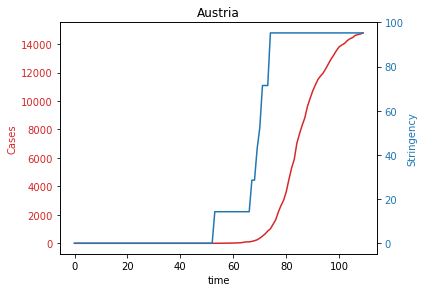

In [12]:
# Cases and stringency for Austria

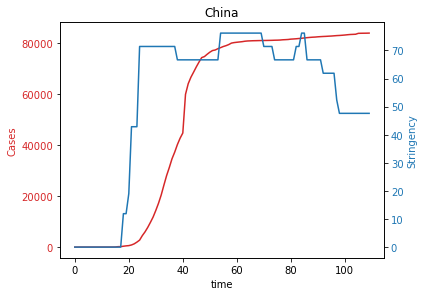

In [14]:
# Cases and stringency for China